In [1]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
text = open('Admiral_Mcraven_make_your_bed.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [3]:
# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

In [4]:
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [5]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [6]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

[' safe', ' attracted', ' adequate', ' adequate', ' obsessed', ' derailed', ' sad', ' happy', ' independent', ' fearful', ' powerless', ' fearful', ' alone', ' average', ' focused', ' happy']
Counter({' adequate': 2, ' happy': 2, ' fearful': 2, ' safe': 1, ' attracted': 1, ' obsessed': 1, ' derailed': 1, ' sad': 1, ' independent': 1, ' powerless': 1, ' alone': 1, ' average': 1, ' focused': 1})


In [7]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment", score['compound'])
    elif score['neg'] < score['pos']:
        print("Positive Sentiment", score['compound'])
    else:
        print("Neutral Sentiment", score['compound'])        


Positive Sentiment 0.9974


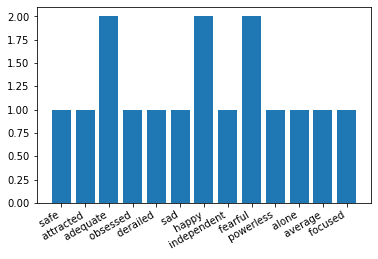

In [8]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()